In [1]:
import ast
import pandas as pd
import numpy as np
from sklearn.utils import resample
import matplotlib.pyplot as plt


In [2]:
users = pd.read_csv('./validation_data/users_data.csv')
tasks_survey = pd.read_csv('./validation_data/tasks_survey.csv')
feedback_survey = pd.read_csv('./validation_data/feedback_survey.csv')
resources_survey = pd.read_csv('./validation_data/resources_survey.csv')
final_survey = pd.read_csv('./validation_data/final_survey.csv')

In [3]:
valid_ids   = set(users["userID"])
valid_forms = set(final_survey["formDate"])

tasks_survey     = tasks_survey[
    tasks_survey["userID"].isin(valid_ids) &
    tasks_survey["formDate"].isin(valid_forms)
].reset_index(drop=True)

feedback_survey  = feedback_survey[
    feedback_survey["userID"].isin(valid_ids) &
    feedback_survey["formDate"].isin(valid_forms)
].reset_index(drop=True)

resources_survey = resources_survey[
    resources_survey["userID"].isin(valid_ids) &
    resources_survey["formDate"].isin(valid_forms)
].reset_index(drop=True)

final_survey     = final_survey[
    final_survey["userID"].isin(valid_ids)
].reset_index(drop=True)

In [4]:
users = users[['userID', 'race', 'gender', 'pd' ]]
# users['pd'] = users['pd'].replace({'yes': 'PD', 'no': 'Non-PD'})

In [5]:
def simplify_race(r):
    # 1) Null/NaN → unknown
    if pd.isnull(r):
        return 'unknown'
    # 2) Parse stringified lists
    if isinstance(r, str):
        try:
            lst = ast.literal_eval(r)
        except (ValueError, SyntaxError):
            lst = [r]
    else:
        lst = r
    # 3) Normalize to stripped strings
    lst = [str(x).strip() for x in lst if str(x).strip()]
    # 4) Empty or only “Prefer not to respond” → unknown
    if not lst or all(x == 'Prefer not to respond' for x in lst):
        return 'unknown'
    # 5) Exactly ['White'] → white
    if lst == ['White']:
        return 'white'
    # 6) Everything else → non‐white
    return 'non-white'

In [6]:
users['race']   = users['race'].apply(simplify_race)
users['gender'] = users['gender'].str.lower()
users['pd']     = users['pd'].str.lower()

In [7]:
for df in (tasks_survey, feedback_survey, resources_survey, final_survey):
    df['formDate'] = pd.to_datetime(df['formDate'])
    df['validation_study'] = np.where(df['formDate'] < '2024-04-01', '1', '2')

In [8]:
tasks_survey_1 = tasks_survey[
    tasks_survey["validation_study"] == '1'
].reset_index(drop=True)
tasks_survey_2 = tasks_survey[
    tasks_survey["validation_study"] == '2'
].reset_index(drop=True)

feedback_survey_1 = feedback_survey[
    feedback_survey["validation_study"] == '1'
].reset_index(drop=True)
feedback_survey_2 = feedback_survey[
    feedback_survey["validation_study"] == '2'
].reset_index(drop=True)

resources_survey_1 = resources_survey[
    resources_survey["validation_study"] == '1'
].reset_index(drop=True)
resources_survey_2 = resources_survey[
    resources_survey["validation_study"] == '2'
].reset_index(drop=True)

final_survey_1 = final_survey[
    final_survey["validation_study"] == '1'
].reset_index(drop=True)
final_survey_2 = final_survey[
    final_survey["validation_study"] == '2'
].reset_index(drop=True)


In [9]:
tasks_survey_1_likert = (
    tasks_survey_1
    .drop(columns=[
         'q3', 'q4'
    ])
    .rename(columns={'q1': 'usability_1', 'q2': 'usability_2'})
)

tasks_survey_2_likert = (
    tasks_survey_2
    .drop(columns=[
         'q3', 'q4'
    ])
    .rename(columns={'q1': 'usability_1', 'q2': 'usability_2'})
)

feedback_survey_1_likert = (
    feedback_survey_1
    .drop(columns=[
         'q5', 'q6', 'q7', 'q8', 'q9'
    ])
    .rename(columns={'q1': 'utility_5', 'q2': 'utility_6', 'q3': 'utility_7', 'q4': 'utility_8'})
)

feedback_survey_2_likert = (
    feedback_survey_2
    .drop(columns=[
         'q8', 'q9'
    ])
    .rename(columns={'q1': 'utility_5', 'q2': 'utility_6', 'q3': 'utility_7', 'q4': 'utility_8', 'q5': 'risks_17', 'q6': 'benefits_20', 'q7': 'benefits_21'})
)

resources_survey_1_likert = (
    resources_survey_1
    .drop(columns=[
         'q3', 'q4', 'q7', 'q8', 'q9', 'q10', 'q11', 'q12', 'q13', 'q14', 'q15', 'q16'
    ])
    .rename(columns={'q1': 'usability_3', 'q2': 'utility_9', 'q5': 'utility_10', 'q6': 'utility_11'})
)

resources_survey_2_likert = (
    resources_survey_2
    .drop(columns=[
         'q4', 'q10', 'q11', 'q12', 'q15', 'q16'
    ])
    .rename(columns={'q1': 'usability_3', 'q2': 'utility_9', 'q3': 'risks_19', 'q5': 'bot_22', 'q6': 'bot_23', 'q7': 'bot_24', 'q8': 'bot_25', 'q9': 'bot_26', 'q13': 'utility_10', 'q14': 'utility_11'})
)

final_survey_1_likert = (
    final_survey_1
    .drop(columns=[
         'q11', 'q12', 'q13', 'q14', 'q15', 'q16', 'q17', 'q18'
    ])
    .rename(columns={'q1': 'usability_4a', 'q2': 'usability_4b', 'q3' : 'usability_4c', 'q4': 'usability_4d', 'q5': 'usability_4e', 'q6': 'usability_4f', 'q7': 'usability_4g', 'q8': 'usability_4h', 'q9': 'usability_4i', 'q10': 'usability_4j'})
)

final_survey_2_likert = (
    final_survey_2
    .drop(columns=[
         'q12', 'q13'
    ])
    .rename(columns={'q1': 'usability_4a', 'q2': 'usability_4b', 'q3' : 'usability_4c', 'q4': 'usability_4d', 'q5': 'usability_4e', 'q6': 'usability_4f', 'q7': 'usability_4g', 'q8': 'usability_4h', 'q9': 'usability_4i', 'q10': 'usability_4j', 'q11': 'risks_18', 'q14': 'preference_12', 'q15': 'preference_13', 'q16': 'preference_14', 'q17': 'preference_15', 'q18': 'preference_16'})
)

In [10]:
tasks_likert     = pd.concat([tasks_survey_1_likert,     tasks_survey_2_likert],     ignore_index=True, sort=False)
feedback_likert  = pd.concat([feedback_survey_1_likert,  feedback_survey_2_likert],  ignore_index=True, sort=False)
resources_likert = pd.concat([resources_survey_1_likert, resources_survey_2_likert], ignore_index=True, sort=False)
final_likert     = pd.concat([final_survey_1_likert,     final_survey_2_likert],     ignore_index=True, sort=False)

for df in (tasks_likert, feedback_likert, resources_likert, final_likert):
    df.drop(columns=['formID'], inplace=True)

KEYS = ['userID', 'validation_study', 'formDate']

all_wide = (
    tasks_likert
      .merge(feedback_likert,  on=KEYS, how='outer')
      .merge(resources_likert, on=KEYS, how='outer')
      .merge(final_likert,     on=KEYS, how='outer')
)


In [11]:
KEYS = ['userID', 'formDate', 'validation_study']

# helper to grab cols by prefix
def split_df(df, prefix):
    cols = [c for c in df.columns if c.startswith(prefix)]
    return df[KEYS + cols]

# split into six
usability_df   = split_df(all_wide, 'usability_')
utility_df     = split_df(all_wide, 'utility_')
preference_df  = split_df(all_wide, 'preference_')
risks_df       = split_df(all_wide, 'risks_')
benefits_df    = split_df(all_wide, 'benefits_')
bot_df         = split_df(all_wide, 'bot_')

# quick sanity‐check
print("usability_df columns:",  usability_df.columns.tolist())
print("utility_df columns:",    utility_df.columns.tolist())
print("preference_df columns:", preference_df.columns.tolist())
print("risks_df columns:",      risks_df.columns.tolist())
print("benefits_df columns:",   benefits_df.columns.tolist())
print("bot_df columns:",        bot_df.columns.tolist())

usability_df columns: ['userID', 'formDate', 'validation_study', 'usability_1', 'usability_2', 'usability_3', 'usability_4g', 'usability_4a', 'usability_4f', 'usability_4j', 'usability_4d', 'usability_4e', 'usability_4h', 'usability_4b', 'usability_4i', 'usability_4c']
utility_df columns: ['userID', 'formDate', 'validation_study', 'utility_5', 'utility_8', 'utility_6', 'utility_7', 'utility_11', 'utility_10', 'utility_9']
preference_df columns: ['userID', 'formDate', 'validation_study', 'preference_13', 'preference_12', 'preference_15', 'preference_14', 'preference_16']
risks_df columns: ['userID', 'formDate', 'validation_study', 'risks_17', 'risks_19', 'risks_18']
benefits_df columns: ['userID', 'formDate', 'validation_study', 'benefits_20', 'benefits_21']
bot_df columns: ['userID', 'formDate', 'validation_study', 'bot_24', 'bot_23', 'bot_22', 'bot_25', 'bot_26']


In [12]:
usability_user_df = usability_df.merge(users, on='userID')
utility_user_df   = utility_df.merge(users, on='userID')
preference_user_df= preference_df.merge(users, on='userID')
risks_user_df     = risks_df.merge(users, on='userID' )
benefits_user_df  = benefits_df.merge(users, on='userID')
bot_user_df       = bot_df.merge(users, on='userID')

In [13]:
def bootstrap_mean_ci(series: pd.Series, n_iterations: int = 1000):

    # Drop NA values
    data = series.dropna().values

    # Bootstrap sampling
    props = []
    for _ in range(n_iterations):
        sample = resample(data, replace=True, n_samples=len(data))
        props.append(sample.mean())

    props = np.array(props)
    mu = props.mean()

    b = len(props)
    se = np.sqrt(np.sum((props - mu)**2) / (b - 1))

    ci = (mu - 1.96 * se, mu + 1.96 * se)

    return mu, se, ci

In [14]:
def get_group_scores(df, group_col, exclude=None, score_col='usability_score', n_iterations=1000):
   
    sub = df.copy()
    sub[group_col] = sub[group_col].str.lower()

    if exclude:
        sub = sub[~sub[group_col].isin([e.lower() for e in exclude])]

    results = []

    def fmt(x):
        return float(round(x, 2))

    # Per-group scores
    for group, group_df in sub.groupby(group_col):
        series = group_df[score_col]
        if series.dropna().empty:
            continue
        mu, se, ci = bootstrap_mean_ci(series, n_iterations=n_iterations)
        results.append({
            'group': group,
            'mean': fmt(mu),
            'se': fmt(se),
            'ci_lower': fmt(ci[0]),
            'ci_upper': fmt(ci[1])
        })

    # Overall "all" group
    overall_series = sub[score_col]
    if not overall_series.dropna().empty:
        mu, se, ci = bootstrap_mean_ci(overall_series, n_iterations=n_iterations)
        results.append({
            'group': 'all',
            'mean': fmt(mu),
            'se': fmt(se),
            'ci_lower': fmt(ci[0]),
            'ci_upper': fmt(ci[1])
        })

    return results


In [15]:
def get_all_group_scores(df, group_cols, exclude_map=None, score_col='usability_score', n_iterations=1000):

    results = {}

    for group_col in group_cols:
        exclude = exclude_map.get(group_col, []) if exclude_map else None
        group_scores = get_group_scores(df, group_col, exclude=exclude, score_col=score_col, n_iterations=n_iterations)
        results[group_col] = group_scores

    return results

In [16]:
group_columns = ['race', 'gender', 'pd', 'validation_study']
exclude_values = {
    'gender': ['prefer not to respond'],
    'race': ['unknown'],
    'pd': [],
    'validation_study': []
}

In [17]:
def plot_group_summary(
    summary,
    y_scale=(1, 5),
    y_scale_name='Usability Score',
    save=False,
    filename='groupwise_summary.png'
):

    dims = list(summary.keys())
    dim_names = [d.replace('_', ' ').title() for d in dims]

    # Manual label remapping
    label_map = {
        '1': 'Supervised',
        '2': 'Unsupervised',
        'yes': 'PD',
        'no': 'Non-PD'
    }

    # Custom color assignments
    custom_colors = {
        'Female': '#bfd3c1',
        'Male': '#efc7c2',
        'Non-white': '#b388eb',
        'White': '#ceb3f2',
        'PD': '#D76363',
        'Non-PD': '#ACD763',
        'Supervised': '#f0a963',
        'Unsupervised': '#dd7f5a'
    }

    # Prepare data for plotting
    subcats_list, values_list, errors_list, label_list, totals = [], [], [], [], []
    for d in dims:
        stats = summary[d]
        subs = [s for s in stats if s['group'] != 'all']

        groups = [label_map.get(s['group'], s['group'].capitalize()) for s in subs]
        subcats_list.append(groups)
        label_list.append(groups)

        vals = [s['mean'] for s in subs]
        errs = [(s['mean'] - s['ci_lower'], s['ci_upper'] - s['mean']) for s in subs]
        values_list.append(vals)
        errors_list.append(np.array(errs).T)

        totals.append([s['mean'] for s in stats if s['group'] == 'all'][0])

    # Plot setup
    fig, ax = plt.subplots(figsize=(10, 6))
    x_base = np.arange(len(dims))
    bar_width = 0.25

    # Grey “total” bars
    for i, tot in enumerate(totals):
        n = len(subcats_list[i])
        w = bar_width * (n + 0.5)
        #ax.bar(x_base[i], tot, width=w, color='#E6E6E6', linestyle='--', zorder=0, alpha=0.6, hatch='/')
        ax.bar(x_base[i], tot, width=w, facecolor='#E6E6E6', edgecolor='black', linestyle='--', alpha=0.4, zorder=0, linewidth=2)

    # Subgroup bars with error bars
    positions = []
    for i, (subs, vals, errs) in enumerate(zip(subcats_list, values_list, errors_list)):
        n = len(subs)
        mid = (n - 1) / 2
        for j, (sub, val) in enumerate(zip(subs, vals)):
            xpos = x_base[i] + (j - mid) * bar_width
            color = custom_colors.get(sub, '#999999')
            ax.bar(xpos, val, width=bar_width, color=color, zorder=1)
            ax.errorbar(xpos, val, yerr=[[errs[0][j]], [errs[1][j]]], fmt='none', ecolor='black', capsize=5, zorder=2)
            positions.append((xpos, sub))

    # Subgroup labels
    for xpos, label in positions:
        ax.text(
            xpos, 0,
            label,
            ha='center', va='top',
            rotation=45,
            fontsize=16,
            transform=ax.get_xaxis_transform()
        )

    # Final formatting

    ax.set_xticks(x_base)
    ax.set_xticklabels(dim_names)
    ax.tick_params(axis='x', which='major', pad=90, top=False, bottom=False) 
    ax.set_xticklabels(['Race', 'Sex', 'Diagnosis', 'Supervision'], fontweight='bold', fontsize=16)
    ax.tick_params(axis='y', labelsize=16)
    
    # ax.set_xticks(x_base)
    # ax.set_xticklabels(dim_names)
    # ax.tick_params(axis='x', which='major', labelbottom=False, fontsize=18)
    ax.set_ylim(y_scale)
    ax.set_ylabel(y_scale_name, fontsize=20)
    # ax.set_title('Usability Score Across Demographics', loc='left')
    plt.tight_layout()

    if save:
        fig.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()



In [18]:
def compute_usability_scores(df):
    likert_map = {
        'strongly disagree': 1,
        'disagree':          2,
        'neutral':           3,
        'agree':             4,
        'strongly agree':    5
    }

    reverse_cols = ['usability_4b','usability_4d','usability_4f','usability_4h','usability_4j']

    numeric = df.copy()
    us_cols = [c for c in numeric.columns if c.startswith('usability_')]
    for col in us_cols:
        numeric[col] = numeric[col].str.strip().str.lower().map(likert_map)

    numeric[reverse_cols] = numeric[reverse_cols].apply(lambda x: 6 - x)

    numeric['usability_score'] = numeric[us_cols].mean(axis=1)

    return numeric[['userID', 'race', 'gender', 'pd', 'validation_study', 'usability_score']]

In [19]:
usability_scores_df = compute_usability_scores(usability_user_df)
usability_summary = get_all_group_scores(usability_scores_df, group_columns, exclude_map=exclude_values, score_col='usability_score')

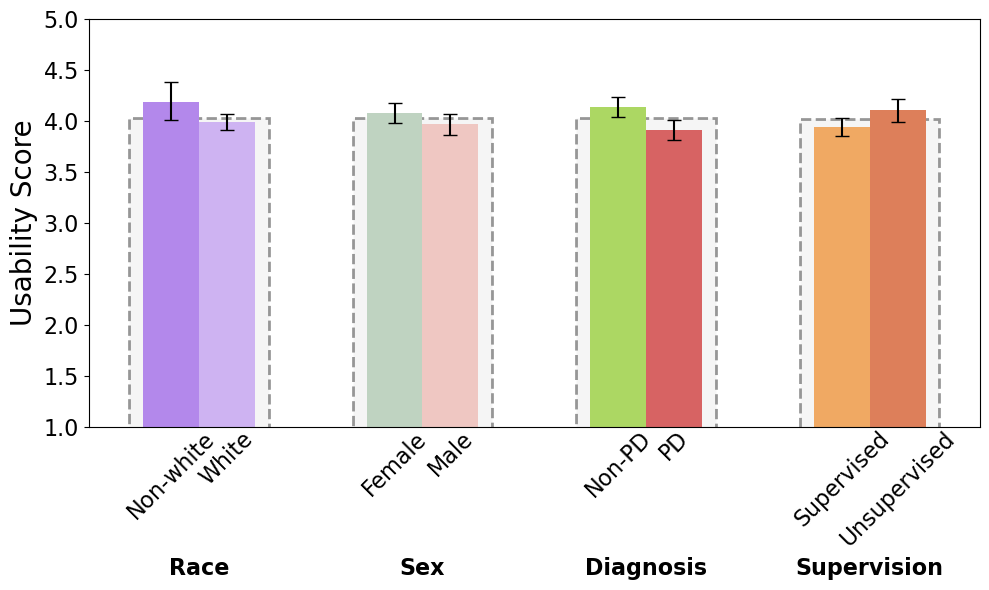

In [20]:
plot_group_summary(summary=usability_summary, save=True, y_scale_name="Usability Score",filename='./plots/figure_4/usability_summary_plot.png')

In [21]:
def compute_utility_scores(df):
    likert_map = {
        'strongly disagree': 1,
        'disagree':          2,
        'neutral':           3,
        'agree':             4,
        'strongly agree':    5
    }

    numeric = df.copy()
    ut_cols = [c for c in numeric.columns if c.startswith('utility_')]
    for col in ut_cols:
        numeric[col] = numeric[col].str.strip().str.lower().map(likert_map)

    numeric['utility_score'] = numeric[ut_cols].mean(axis=1)

    return numeric[['userID', 'race', 'gender', 'pd', 'validation_study', 'utility_score']]

In [22]:
utility_scores_df = compute_utility_scores(utility_user_df)
utility_summary = get_all_group_scores(utility_scores_df, group_columns, exclude_map=exclude_values, score_col='utility_score')

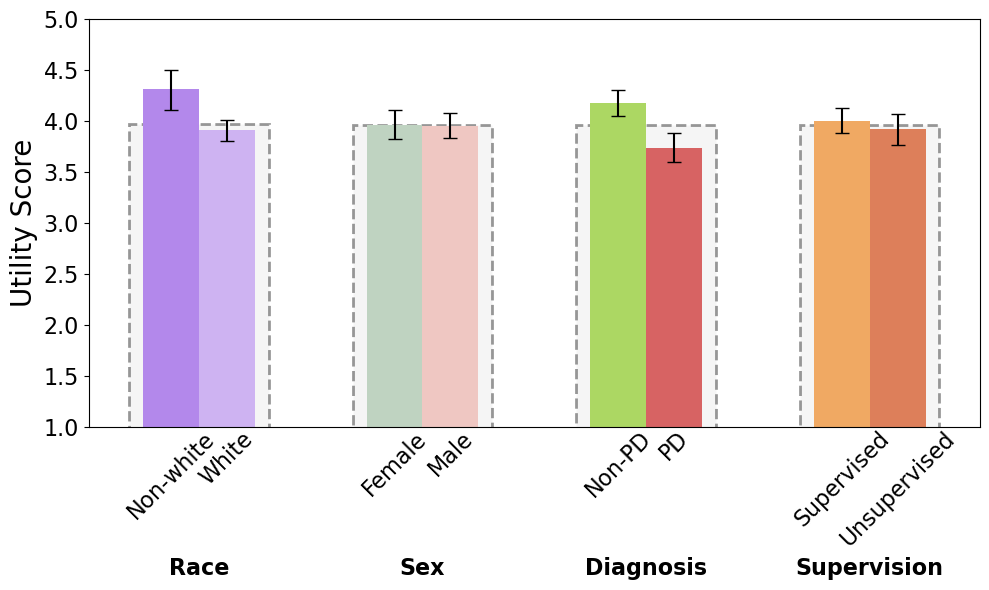

In [23]:
plot_group_summary(summary=utility_summary, save=True, filename='./plots/figure_4/utility_summary_plot.png', y_scale_name="Utility Score")

In [24]:
def plot_group_summary_v2(
    summary,
    y_scale=(1, 5),
    y_scale_name='Usability Score',
    save=False,
    filename='groupwise_summary.png'
):

    dims = list(summary.keys())
    dim_names = [d.replace('_', ' ').title() for d in dims]

    # Manual label remapping
    label_map = {
        '1': 'Supervised',
        '2': 'Unsupervised',
        'yes': 'PD',
        'no': 'Non-PD'
    }

    # Custom color assignments
    custom_colors = {
        'Female': '#bfd3c1',
        'Male': '#efc7c2',
        'Non-white': '#b388eb',
        'White': '#ceb3f2',
        'PD': '#D76363',
        'Non-PD': '#ACD763',
        'Supervised': '#f0a963',
        'Unsupervised': '#dd7f5a'
    }

    # Prepare data for plotting
    subcats_list, values_list, errors_list, label_list, totals = [], [], [], [], []
    dims = [d for d in dims if d!='validation_study']
    dim_names = [dname for dname in dim_names if dname!='Validation Study']
    
    for d in dims:
        stats = summary[d]
        subs = [s for s in stats if s['group'] != 'all']

        groups = [label_map.get(s['group'], s['group'].capitalize()) for s in subs]
        subcats_list.append(groups)
        label_list.append(groups)

        vals = [s['mean'] for s in subs]
        errs = [(s['mean'] - s['ci_lower'], s['ci_upper'] - s['mean']) for s in subs]
        values_list.append(vals)
        errors_list.append(np.array(errs).T)

        totals.append([s['mean'] for s in stats if s['group'] == 'all'][0])

    # Plot setup
    fig, ax = plt.subplots(figsize=(8, 6))
    x_base = np.arange(len(dims))
    bar_width = 0.25

    # Grey “total” bars
    for i, tot in enumerate(totals):
        n = len(subcats_list[i])
        w = bar_width * (n + 0.5)
        #ax.bar(x_base[i], tot, width=w, color='#E6E6E6', linestyle='--', zorder=0, alpha=0.6, hatch='/')
        ax.bar(x_base[i], tot, width=w, facecolor='#E6E6E6', edgecolor='black', linestyle='--', alpha=0.4, zorder=0, linewidth=2)

    # Subgroup bars with error bars
    positions = []
    for i, (subs, vals, errs) in enumerate(zip(subcats_list, values_list, errors_list)):
        n = len(subs)
        mid = (n - 1) / 2
        for j, (sub, val) in enumerate(zip(subs, vals)):
            xpos = x_base[i] + (j - mid) * bar_width
            color = custom_colors.get(sub, '#999999')
            ax.bar(xpos, val, width=bar_width, color=color, zorder=1)
            ax.errorbar(xpos, val, yerr=[[errs[0][j]], [errs[1][j]]], fmt='none', ecolor='black', capsize=5, zorder=2)
            positions.append((xpos, sub))

    # Subgroup labels
    for xpos, label in positions:
        ax.text(
            xpos, 0,
            label,
            ha='center', va='top',
            rotation=45,
            fontsize=16,
            transform=ax.get_xaxis_transform()
        )

    # Final formatting

    ax.set_xticks(x_base)
    ax.set_xticklabels(dim_names)
    ax.tick_params(axis='x', which='major', pad=90, top=False, bottom=False) 
    ax.set_xticklabels(['Race', 'Sex', 'Diagnosis'], fontweight='bold', fontsize=16)
    ax.tick_params(axis='y', labelsize=16)
    
    # ax.set_xticks(x_base)
    # ax.set_xticklabels(dim_names)
    # ax.tick_params(axis='x', which='major', labelbottom=False, fontsize=18)
    ax.set_ylim(y_scale)
    ax.set_ylabel(y_scale_name, fontsize=20)
    # ax.set_title('Usability Score Across Demographics', loc='left')
    plt.tight_layout()

    if save:
        fig.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

In [25]:
def compute_preference_scores(df):
    likert_map = {
        'strongly disagree': 1,
        'disagree':          2,
        'neutral':           3,
        'agree':             4,
        'strongly agree':    5,
        'much less': 1,
        'somewhat less': 2,
        'about the same': 3,
        'somewhat more': 4,
        'much more': 5,
    }

    def map_response(val):
        if pd.isna(val):
            return np.nan
        val = val.strip().lower()
        for key, score in likert_map.items():
            if val.startswith(key):
                return score
        return np.nan  # unmatched values

    numeric = df.copy()
    pref_cols = [c for c in numeric.columns if c.startswith('preference_')]
    for col in pref_cols:
        numeric[col] = numeric[col].map(map_response)

    numeric['preference_score'] = numeric[pref_cols].mean(axis=1)

    return numeric[['userID', 'race', 'gender', 'pd', 'validation_study', 'preference_score']]


In [26]:
preference_scores_df = compute_preference_scores(preference_user_df)
preference_summary = get_all_group_scores(preference_scores_df, group_columns, exclude_map=exclude_values, score_col='preference_score')

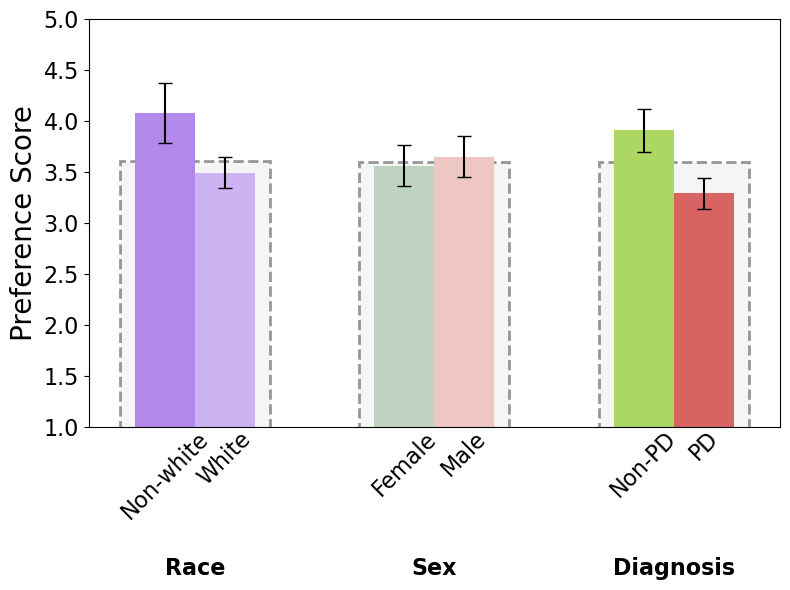

In [27]:
plot_group_summary_v2(summary=preference_summary, save=True, filename='./plots/figure_4/preference_summary_plot.png', y_scale_name="Preference Score")

In [28]:
def compute_risks_scores(df):
    likert_map = {
        'strongly disagree': 0.0,
        'disagree':          0.25,
        'neutral':           0.5,
        'agree':             0.75,
        'strongly agree':    1,
        'yes': 1,
        'no': 0
    }

    numeric = df.copy()
    rsk_cols = [c for c in numeric.columns if c.startswith('risks_')]
    for col in rsk_cols:
        numeric[col] = numeric[col].str.strip().str.lower().map(likert_map)

    numeric['risks_score'] = numeric[rsk_cols].mean(axis=1)

    return numeric[['userID', 'race', 'gender', 'pd', 'validation_study', 'risks_score']]

In [29]:
risks_scores_df = compute_risks_scores(risks_user_df)
risks_summary = get_all_group_scores(risks_scores_df, group_columns, exclude_map=exclude_values, score_col='risks_score')

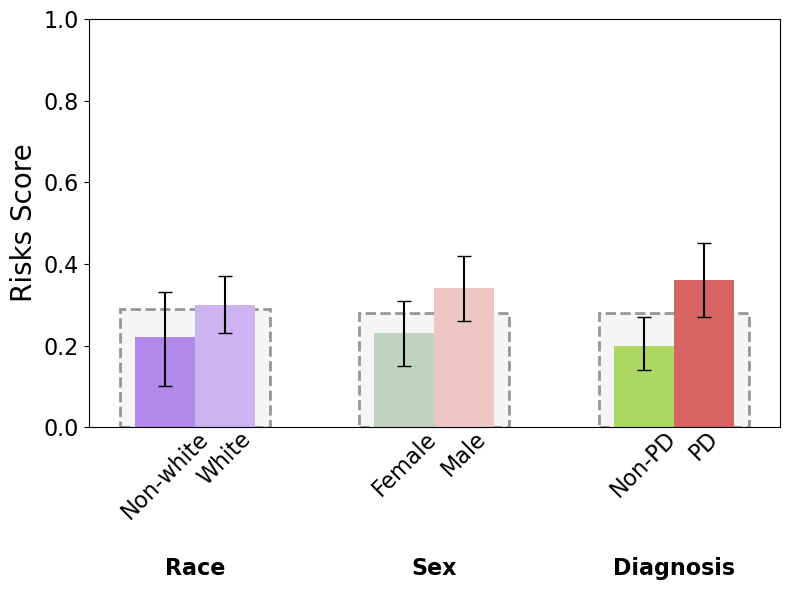

In [30]:
plot_group_summary_v2(summary=risks_summary, save=True, filename='./plots/figure_4/risks_summary_plot.png', y_scale_name="Risks Score", y_scale=(0, 1))

In [31]:
def compute_benefits_scores(df):
    likert_map = {
        'strongly disagree': 1,
        'disagree':          2,
        'neutral':           3,
        'agree':             4,
        'strongly agree':    5
    }

    numeric = df.copy()
    bnf_cols = [c for c in numeric.columns if c.startswith('benefits_')]
    for col in bnf_cols:
        numeric[col] = numeric[col].str.strip().str.lower().map(likert_map)

    numeric['benefits_score'] = numeric[bnf_cols].mean(axis=1)

    return numeric[['userID', 'race', 'gender', 'pd', 'validation_study', 'benefits_score']]

In [32]:
benefits_scores_df = compute_benefits_scores(benefits_user_df)
benefits_summary = get_all_group_scores(benefits_scores_df, group_columns, exclude_map=exclude_values, score_col='benefits_score')

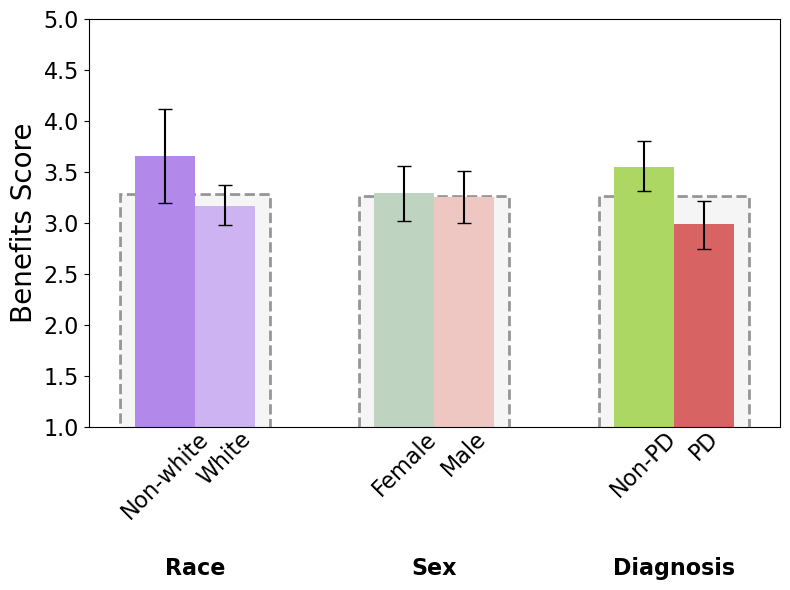

In [33]:
plot_group_summary_v2(summary=benefits_summary, save=True, filename='./plots/figure_4/benefits_summary_plot.png', y_scale_name="Benefits Score", y_scale=(1, 5))

In [34]:
def compute_bot_scores(df):
    likert_map = {
        'never': 1,
        'sometimes':          2,
        'often':           3
    }

    numeric = df.copy()
    bnf_cols = [c for c in numeric.columns if c.startswith('bot_')]
    for col in bnf_cols:
        numeric[col] = numeric[col].str.strip().str.lower().map(likert_map)

    numeric['bot_score'] = numeric[bnf_cols].mean(axis=1)

    return numeric[['userID', 'race', 'gender', 'pd', 'validation_study', 'bot_score']]

In [35]:
bot_scores_df = compute_bot_scores(bot_user_df)
bot_summary = get_all_group_scores(bot_scores_df, group_columns, exclude_map=exclude_values, score_col='bot_score')

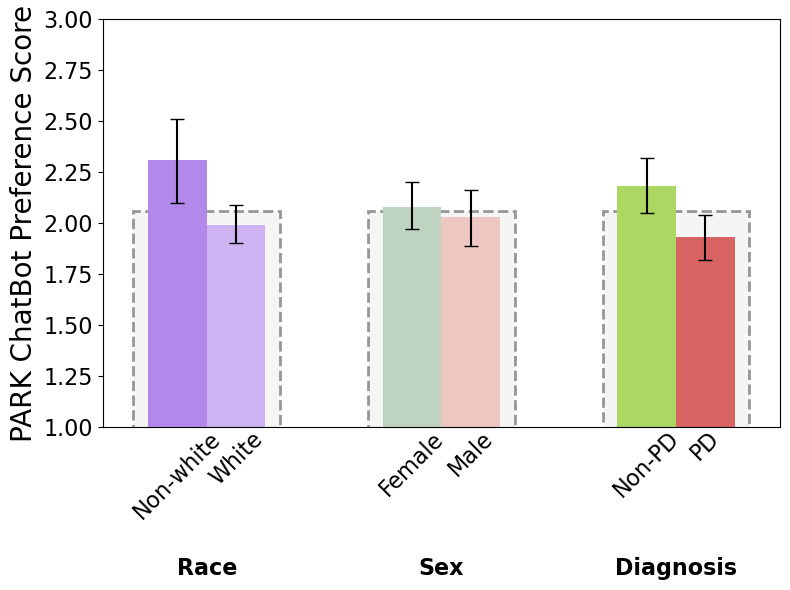

In [36]:
plot_group_summary_v2(summary=bot_summary, save=True, filename='./plots/figure_4/bot_summary_plot.png', y_scale_name="PARK ChatBot Preference Score", y_scale=(1, 3))

# Calculating SUS Score

In [37]:
def compute_individual_sus(df):
    likert_map = {
        'strongly disagree': 1,
        'disagree':          2,
        'neutral':           3,
        'agree':             4,
        'strongly agree':    5
    }
    sus_cols = [f'usability_4{c}' for c in list('abcdefghij')]  # a→j

    num = df.copy()
    # map text→1–5
    for col in sus_cols:
        num[col] = (
            num[col]
              .str.strip()
              .str.lower()
              .map(likert_map)
        )

    # drop any row missing a SUS item
    num = num.dropna(subset=sus_cols)

    # odd = a, c, e, g, i  ;  even = b, d, f, h, j
    odd  = [f'usability_4{c}' for c in ['a','c','e','g','i']]
    even = [f'usability_4{c}' for c in ['b','d','f','h','j']]

    # x = sum(odd) - 5 ;  y = sum(even) - 25
    sum_odd  = num[odd].sum(axis=1)
    sum_even = num[even].sum(axis=1)
    num['sus_score'] = ( (sum_odd  - 5) + (25 - sum_even) ) * 2.5

    return num[['userID', 'validation_study', 'sus_score']]

In [38]:
def compute_sus_summary(df, n_iterations: int = 1000):
    sus_df = compute_individual_sus(df)
    summary = []

    # for each validation_study
    for group, sub in sus_df.groupby('validation_study'):
        mu, se, (lo, hi) = bootstrap_mean_ci(sub['sus_score'], n_iterations)
        summary.append({
            'group': group,
            'mean':      round(mu, 2),
            'se':        round(se, 2),
            'ci_lower':  round(lo, 2),
            'ci_upper':  round(hi, 2),
            'n':         len(sub)
        })

    # overall “all”
    mu, se, (lo, hi) = bootstrap_mean_ci(sus_df['sus_score'], n_iterations)
    summary.append({
        'group':     'all',
        'mean':      round(mu, 2),
        'se':        round(se, 2),
        'ci_lower':  round(lo, 2),
        'ci_upper':  round(hi, 2),
        'n':         len(sus_df)
    })

    return summary

In [39]:
sus_summary = compute_sus_summary(usability_user_df)
print(sus_summary)

[{'group': '1', 'mean': 70.72, 'se': 1.29, 'ci_lower': 68.2, 'ci_upper': 73.25, 'n': 101}, {'group': '2', 'mean': 75.45, 'se': 1.54, 'ci_lower': 72.43, 'ci_upper': 78.48, 'n': 102}, {'group': 'all', 'mean': 73.14, 'se': 1.03, 'ci_lower': 71.13, 'ci_upper': 75.15, 'n': 203}]


# Compute Specific Columns Scores

In [40]:
def bootstrap_likert_ci(
    series: pd.Series,
    likert_map: dict[str, float],
    n_iterations: int = 1000
):
    numeric = (
        series
        .astype(str)
        .str.strip()
        .str.lower()
        .map(likert_map)
    )
    return bootstrap_mean_ci(numeric, n_iterations=n_iterations)

In [41]:
def bootstrap_likert_ci_2(
    series: pd.Series,
    likert_map: dict[str, float],
    n_iterations: int = 1000
):
    
    def map_response(val):
        if pd.isna(val):
            return np.nan
        text = val.strip().lower()
        if text in likert_map:
            return likert_map[text]
        for key, score in likert_map.items():
            if text.startswith(key):
                return score
        return np.nan

    numeric = series.map(map_response)
    return bootstrap_mean_ci(numeric, n_iterations=n_iterations)

In [42]:
likert_map = {
    'strongly disagree': 1,
    'disagree':          2,
    'neutral':           3,
    'agree':             4,
    'strongly agree':    5
}

osn_map = {
    'never': 1,
    'sometimes':          2,
    'often':           3
}

yn_map = {
    'yes': 1,
    'no': 0
}

msasm_map = {
    'much less': 1,
    'somewhat less': 2,
    'about the same': 3,
    'somewhat more': 4,
    'much more': 5,
}


In [43]:
mu, se, (lo, hi) = bootstrap_likert_ci_2(preference_user_df['preference_12'], likert_map=msasm_map, n_iterations=1000)
print(f"{mu:.2f} ± {se:.2f} = [{lo:.2f},{hi:.2f}]")

4.14 ± 0.09 = [3.96,4.31]


In [44]:
mu, se, (lo, hi) = bootstrap_likert_ci_2(preference_user_df['preference_13'], likert_map=msasm_map, n_iterations=1000)
print(f"{mu:.2f} ± {se:.2f} = [{lo:.2f},{hi:.2f}]")

4.22 ± 0.09 = [4.04,4.39]


In [45]:
mu, se, (lo, hi) = bootstrap_likert_ci_2(preference_user_df['preference_14'], likert_map=msasm_map, n_iterations=1000)
print(f"{mu:.2f} ± {se:.2f} = [{lo:.2f},{hi:.2f}]")

2.92 ± 0.14 = [2.65,3.20]


In [46]:
mu, se, (lo, hi) = bootstrap_likert_ci_2(preference_user_df['preference_15'], likert_map=msasm_map, n_iterations=1000)
print(f"{mu:.2f} ± {se:.2f} = [{lo:.2f},{hi:.2f}]")

3.53 ± 0.12 = [3.30,3.76]


In [47]:
mu, se, (lo, hi) = bootstrap_likert_ci_2(preference_user_df['preference_16'], likert_map=likert_map, n_iterations=1000)
print(f"{mu:.2f} ± {se:.2f} = [{lo:.2f},{hi:.2f}]")

3.19 ± 0.11 = [2.98,3.41]


In [48]:
mu, se, (lo, hi) = bootstrap_likert_ci_2(bot_user_df['bot_22'], likert_map=osn_map, n_iterations=1000)
print(f"{mu:.2f} ± {se:.2f} = [{lo:.2f},{hi:.2f}]")

1.99 ± 0.05 = [1.89,2.09]


In [49]:
mu, se, (lo, hi) = bootstrap_likert_ci_2(bot_user_df['bot_24'], likert_map=osn_map, n_iterations=1000)
print(f"{mu:.2f} ± {se:.2f} = [{lo:.2f},{hi:.2f}]")

2.15 ± 0.05 = [2.04,2.26]


In [50]:
mu, se, (lo, hi) = bootstrap_likert_ci_2(bot_user_df['bot_23'], likert_map=osn_map, n_iterations=1000)
print(f"{mu:.2f} ± {se:.2f} = [{lo:.2f},{hi:.2f}]")

2.03 ± 0.05 = [1.94,2.13]


In [51]:
mu, se, (lo, hi) = bootstrap_likert_ci_2(bot_user_df['bot_25'], likert_map=osn_map, n_iterations=1000)
print(f"{mu:.2f} ± {se:.2f} = [{lo:.2f},{hi:.2f}]")

2.02 ± 0.05 = [1.92,2.13]


In [52]:
mu, se, (lo, hi) = bootstrap_likert_ci_2(bot_user_df['bot_26'], likert_map=osn_map, n_iterations=1000)
print(f"{mu:.2f} ± {se:.2f} = [{lo:.2f},{hi:.2f}]")

2.09 ± 0.05 = [1.99,2.19]
